In [46]:
from facenet_pytorch import MTCNN
import torch
import numpy as np
import cv2
import os 
from PIL import Image, ImageDraw
from IPython import display
import matplotlib.pyplot as plt

In [47]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


In [60]:
mtcnn = MTCNN(margin=20, post_process=False, device=device)

In [102]:
faces = []
for subdir in os.listdir("data/train"):
        path1 = os.path.join("data", "train", subdir)
        for filename in os.listdir(path1):
            # path
            path = os.path.join(path1, filename)
            # get face
            img = cv2.imread(path)
            img_rgb = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            faces.append(img_rgb)
            break
len(faces)

10

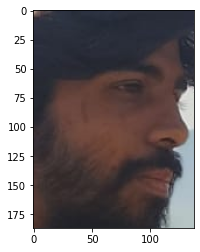

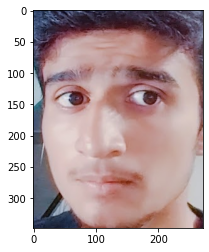

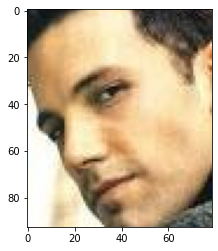

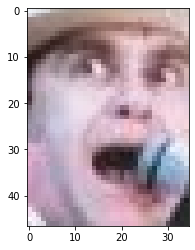

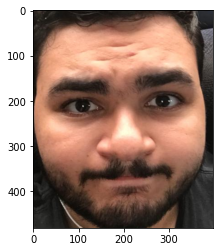

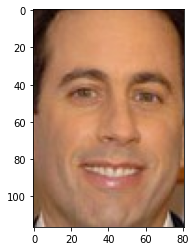

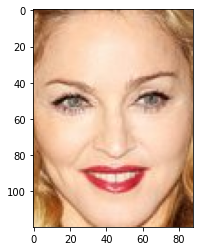

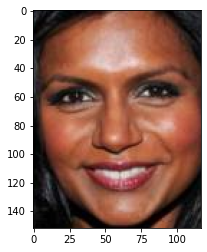

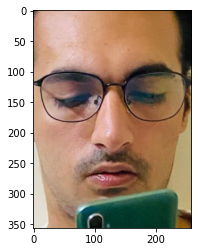

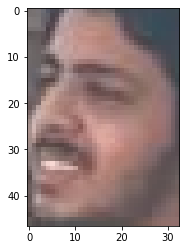

In [103]:
pixels = []
for face in faces:
    # Detect faces
    boxes, _ = mtcnn.detect(face)
    for c, i in enumerate(_):
        if i > 0.95:
            box = boxes[c]
            f = face.crop((box[0], box[1], box[2], box[3]))
            pixels.append(f)
            plt.figure()
            plt.imshow(f)
    
    


In [89]:
len(pixels)

172